In [1]:
from helpers import *
from plot_helpers import *
from sklearn.model_selection import train_test_split
from timer import Timer
from sklearn.decomposition import IncrementalPCA

In [2]:
index_ = "L60"

In [3]:
size = 60*60
samples = 1000

dtypes = dict([(i, np.int8) for i in range(1,size+1)])
dtypes[0]=np.float32

rawL60 = pd.read_csv("../data/DataBool_C_L60_MCS200000_WT20000.txt", sep=" ", header=None, dtype=dtypes)
# prepare data
X, Y, val_set = base_prepare(rawL60,
                             exportLabels = True,
                             normalize_data = False,
                             select_val_set=True,
                             nsamples=samples,
                             index_=index_,
                             save=False)

In [4]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, shuffle=True)
print("X_train_size: ", X_train.shape)
print("X_test_size: ", X_test.shape)
print("Y_train_size: ", Y_train.shape)
print("Y_test_size: ", Y_test.shape)

X_train_size:  (281740, 3600)
X_test_size:  (70436, 3600)
Y_train_size:  (281740, 2)
Y_test_size:  (70436, 2)


In [5]:
num_classes = 2
epochs = 100
batch_size = 400

input_shape = (X_train.shape[1],)

In [6]:
# Define Callbacks
# Initializing callbacks
path = f"./model_{index_}.h5"

# Saves the model in-between epochs when there is an improvement in "val_loss"
checkpoint = ModelCheckpoint(path,
                                monitor="val_loss",
                                mode="min",
                                save_best_only = True,
                                verbose=1)

# Stops training the model when no improvement in "val_loss" is observed after set "patience"
earlystop = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0, 
                              patience = 6,
                              verbose = 1,
                              restore_best_weights = True)

# Monitors "val_loss" for a set 'patience', then the learning rate is reduced by a factor specified manually.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              patience = 4, verbose=1,
                              factor=0.3)


callbacks = [checkpoint, earlystop, reduce_lr]
# callbacks = [checkpoint, reduce_lr]


METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy")
]

In [7]:
model = build_func_model(input_shape, hidden_units=100, l2_reg=0.1, bias_factor=0.001)

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 14s 17ms/step - loss: 5.1390 - categorical_accuracy: 0.7718 - val_loss: 0.0834 - val_categorical_accuracy: 0.9879

Epoch 00001: val_loss improved from inf to 0.08345, saving model to .\model_L60.h5
Epoch 2/100
705/705 [==============================] - 10s 14ms/step - loss: 0.0841 - categorical_accuracy: 0.9872 - val_loss: 0.3677 - val_categorical_accuracy: 0.9882

Epoch 00002: val_loss did not improve from 0.08345
Epoch 3/100
705/705 [==============================] - 10s 14ms/step - loss: 0.3196 - categorical_accuracy: 0.9563 - val_loss: 0.0627 - val_categorical_accuracy: 0.9914

Epoch 00003: val_loss improved from 0.08345 to 0.06273, saving model to .\model_L60.h5
Epoch 4/100
705/705 [==============================] - 10s 15ms/step - loss: 0.0623 - categorical_accuracy: 0.9899 - val_loss: 0.0556 - val_categorical_accuracy: 0.9914

Epoch 00004: val_loss improved from 0.06273 to 0.05559, saving model to .\model_L60.h5
Epoch 5/100


705/705 [==============================] - 10s 14ms/step - loss: 0.0357 - categorical_accuracy: 0.9918 - val_loss: 0.0332 - val_categorical_accuracy: 0.9925

Epoch 00034: val_loss improved from 0.03379 to 0.03318, saving model to .\model_L60.h5
Epoch 35/100
705/705 [==============================] - 10s 14ms/step - loss: 0.0338 - categorical_accuracy: 0.9923 - val_loss: 0.0331 - val_categorical_accuracy: 0.9927

Epoch 00035: val_loss improved from 0.03318 to 0.03313, saving model to .\model_L60.h5
Epoch 36/100
705/705 [==============================] - 10s 15ms/step - loss: 0.0346 - categorical_accuracy: 0.9921 - val_loss: 0.0327 - val_categorical_accuracy: 0.9924

Epoch 00036: val_loss improved from 0.03313 to 0.03272, saving model to .\model_L60.h5
Epoch 37/100
705/705 [==============================] - 10s 15ms/step - loss: 0.0344 - categorical_accuracy: 0.9921 - val_loss: 0.0361 - val_categorical_accuracy: 0.9910

Epoch 00037: val_loss did not improve from 0.03272
Epoch 38/100
705/

705/705 [==============================] - 10s 14ms/step - loss: 0.0300 - categorical_accuracy: 0.9921 - val_loss: 0.0293 - val_categorical_accuracy: 0.9925

Epoch 00068: val_loss improved from 0.02948 to 0.02927, saving model to .\model_L60.h5
Epoch 69/100
705/705 [==============================] - 10s 15ms/step - loss: 0.0299 - categorical_accuracy: 0.9921 - val_loss: 0.0293 - val_categorical_accuracy: 0.9924

Epoch 00069: val_loss did not improve from 0.02927
Epoch 70/100
705/705 [==============================] - 10s 15ms/step - loss: 0.0302 - categorical_accuracy: 0.9922 - val_loss: 0.0293 - val_categorical_accuracy: 0.9923

Epoch 00070: val_loss did not improve from 0.02927
Epoch 71/100
705/705 [==============================] - 10s 14ms/step - loss: 0.0295 - categorical_accuracy: 0.9924 - val_loss: 0.0292 - val_categorical_accuracy: 0.9926

Epoch 00071: val_loss improved from 0.02927 to 0.02923, saving model to .\model_L60.h5
Epoch 72/100
705/705 [==============================]

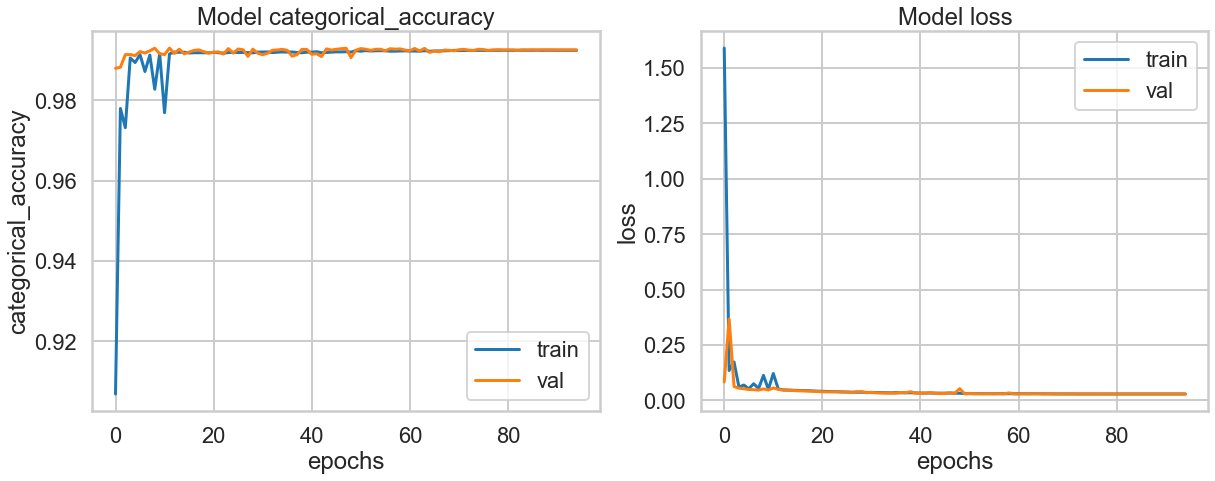

In [8]:
def plot_history(history, metric_names=["categorical_accuracy", "loss"], filename = "", figsize=(20, 7)):
    """
    plot and saves history from model history
    """
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.ravel()
    historyDataFrame = pd.DataFrame()
    metrics = metric_names
    for i, met in enumerate(metrics):
        historyDataFrame[met] = history.history[met]
        historyDataFrame["val_" + met] = history.history["val_" + met]
        ax[i].plot(history.history[met])
        ax[i].plot(history.history["val_" + met])
        ax[i].set_title("Model {}".format(met))
        ax[i].set_xlabel("epochs")
        ax[i].set_ylabel(met)
        ax[i].legend(["train", "val"])
    if filename:
        historyDataFrame.to_csv(filename)

        
plot_history(history)

In [9]:
val_loss, val_acc = model.evaluate(x=X_test, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 8ms/step - loss: 0.0292 - categorical_accuracy: 0.9926
Validation loss: 0.0292
Validation accuracy: 0.993


In [10]:
df_pred60 = generate_predictions(val_set, model, f"predictions_{index_}.csv", only_mean=False)

440/440 [==============================] - 2s 5ms/step


# PCA reduction

In [11]:
pca = IncrementalPCA(2)
pca.fit(X_train)

IncrementalPCA(n_components=2)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
pca.explained_variance_ratio_

array([0.31659432, 0.00360576])

In [14]:
X_train_pca = X_train_pca.astype(np.float32)
X_test_pca = X_test_pca.astype(np.float32)

input_shape = (X_train_pca.shape[1],)

model = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model.fit(X_train_pca, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 7s 9ms/step - loss: 4.2396 - categorical_accuracy: 0.9885 - val_loss: 0.0573 - val_categorical_accuracy: 0.9900

Epoch 00001: val_loss did not improve from 0.02919
Epoch 2/100
705/705 [==============================] - 5s 8ms/step - loss: 0.0534 - categorical_accuracy: 0.9900 - val_loss: 0.0450 - val_categorical_accuracy: 0.9900

Epoch 00002: val_loss did not improve from 0.02919
Epoch 3/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0447 - categorical_accuracy: 0.9909 - val_loss: 0.0402 - val_categorical_accuracy: 0.9905

Epoch 00003: val_loss did not improve from 0.02919
Epoch 4/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0413 - categorical_accuracy: 0.9910 - val_loss: 0.0385 - val_categorical_accuracy: 0.9899

Epoch 00004: val_loss did not improve from 0.02919
Epoch 5/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0386 - categorical_accuracy: 0.9915 - val_loss:


Epoch 00036: val_loss improved from 0.02506 to 0.02496, saving model to .\model_L60.h5
Epoch 37/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0257 - categorical_accuracy: 0.9925 - val_loss: 0.0249 - val_categorical_accuracy: 0.9929

Epoch 00037: val_loss improved from 0.02496 to 0.02495, saving model to .\model_L60.h5
Epoch 38/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0258 - categorical_accuracy: 0.9924 - val_loss: 0.0250 - val_categorical_accuracy: 0.9927

Epoch 00038: val_loss did not improve from 0.02495
Epoch 39/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0255 - categorical_accuracy: 0.9925 - val_loss: 0.0249 - val_categorical_accuracy: 0.9927

Epoch 00039: val_loss improved from 0.02495 to 0.02489, saving model to .\model_L60.h5
Epoch 40/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0257 - categorical_accuracy: 0.9925 - val_loss: 0.0251 - val_categorical_accuracy: 0.9927

Epoch 00040

In [15]:
val_loss, val_acc = model.evaluate(x=X_test_pca, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 5ms/step - loss: 0.0246 - categorical_accuracy: 0.9929
Validation loss: 0.0246
Validation accuracy: 0.993


In [16]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca = pca.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred60_pca = generate_predictions(val_set, val_set_pca, model, f"predictions_{index_}_PCA.csv", only_mean=False)

440/440 [==============================] - 1s 2ms/step


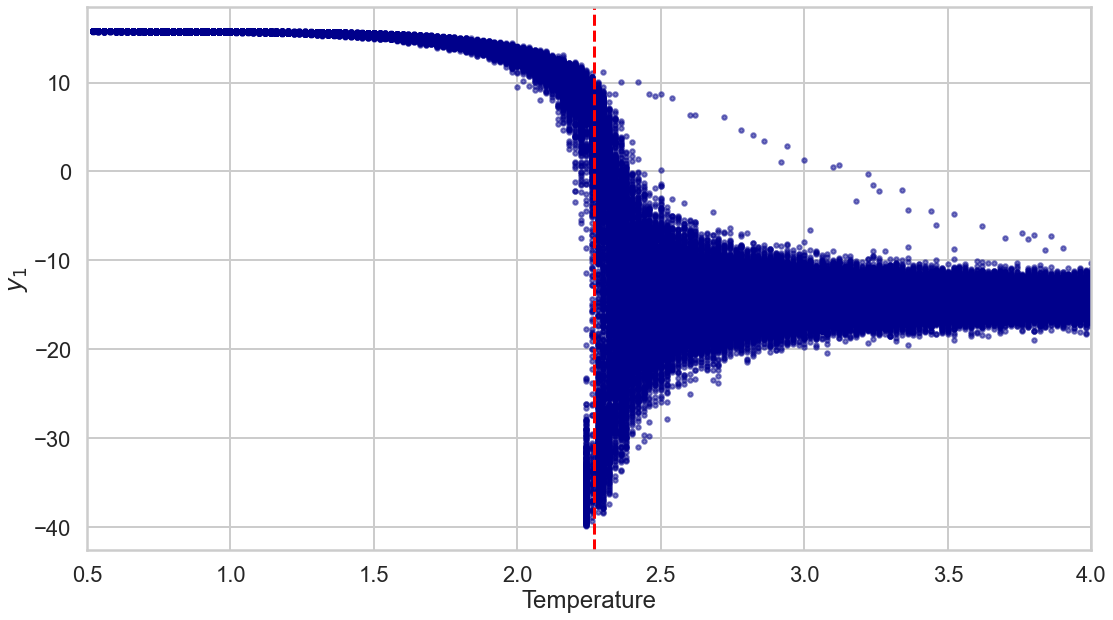

In [17]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,0], s=20, color="darkblue", alpha=0.5)
ax.set_ylabel(r"$y_1$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="red")
plt.savefig(f"pca_{index_}_1st_comp_on_temperature.svg", bbox_inches="tight")

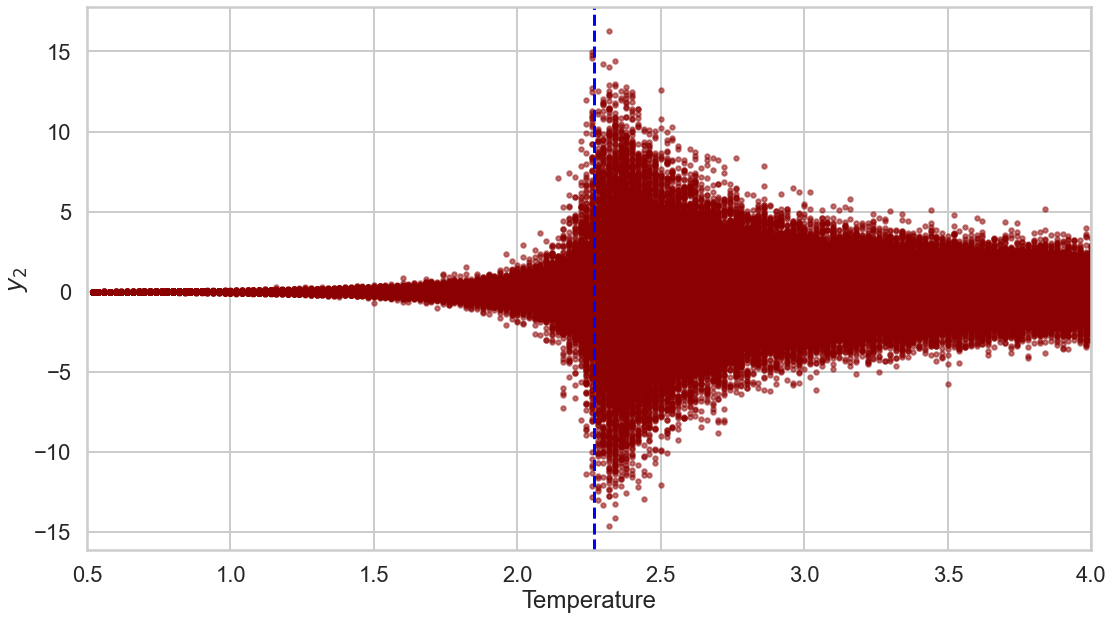

In [18]:
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(val_set.iloc[:,0], val_set_pca[:,1], s=20, color="darkred", alpha=0.5)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel("Temperature")
ax.set_xlim([0.5, 4.0])
ax.axvline(2.2669, linestyle="--", color="blue")
plt.savefig(f"pca_{index_}_2nd_comp_on_temperature.svg", bbox_inches="tight")

In [19]:
df = pd.DataFrame()
df["Temperature"] = val_set.iloc[:,0]
df["1st component"] = val_set_pca[:,0]
df["2nd component"] = val_set_pca[:,1]
df.to_csv(f"projections_{index_}.csv")

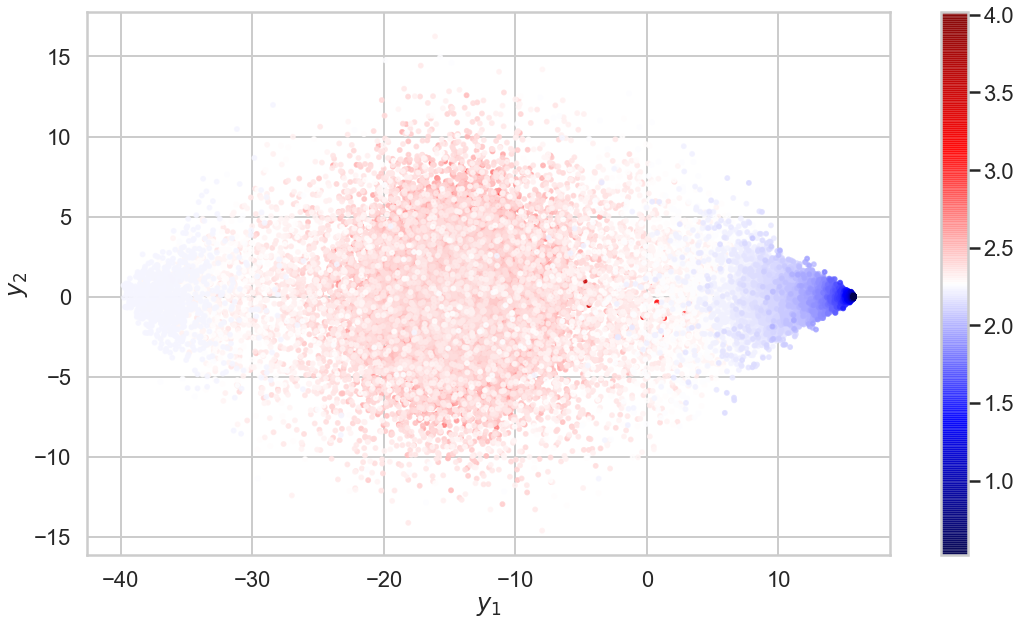

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
p = ax.scatter(df["1st component"], df["2nd component"], c=df["Temperature"], cmap="seismic", s=15, alpha=0.8)
plt.colorbar(p)
ax.set_ylabel(r"$y_2$")
ax.set_xlabel(r"$y_1$")
plt.savefig(f"pca_{index_}_projections.png", bbox_inches="tight")

# PCA components 460

In [7]:
components = 460

pca100 = IncrementalPCA(components)
pca100.fit(X_train)

X_train_pca100 = pca100.transform(X_train).astype(np.float32)
X_test_pca100 = pca100.transform(X_test).astype(np.float32)

input_shape = (X_test_pca100.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca100, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca100, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 17s 14ms/step - loss: 8.1008 - categorical_accuracy: 0.9800 - val_loss: 0.0670 - val_categorical_accuracy: 0.9897

Epoch 00001: val_loss improved from inf to 0.06700, saving model to .\model_L60.h5
Epoch 2/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0639 - categorical_accuracy: 0.9897 - val_loss: 0.0555 - val_categorical_accuracy: 0.9899

Epoch 00002: val_loss improved from 0.06700 to 0.05550, saving model to .\model_L60.h5
Epoch 3/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0554 - categorical_accuracy: 0.9894 - val_loss: 0.0500 - val_categorical_accuracy: 0.9900

Epoch 00003: val_loss improved from 0.05550 to 0.05005, saving model to .\model_L60.h5
Epoch 4/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0507 - categorical_accuracy: 0.9902 - val_loss: 0.0477 - val_categorical_accuracy: 0.9908

Epoch 00004: val_loss improved from 0.05005 to 0.04767, saving model 

705/705 [==============================] - 6s 9ms/step - loss: 0.0279 - categorical_accuracy: 0.9924 - val_loss: 0.0265 - val_categorical_accuracy: 0.9929

Epoch 00034: val_loss improved from 0.02666 to 0.02650, saving model to .\model_L60.h5
Epoch 35/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0271 - categorical_accuracy: 0.9926 - val_loss: 0.0265 - val_categorical_accuracy: 0.9930

Epoch 00035: val_loss improved from 0.02650 to 0.02649, saving model to .\model_L60.h5
Epoch 36/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0277 - categorical_accuracy: 0.9922 - val_loss: 0.0265 - val_categorical_accuracy: 0.9929

Epoch 00036: val_loss did not improve from 0.02649
Epoch 37/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0274 - categorical_accuracy: 0.9926 - val_loss: 0.0264 - val_categorical_accuracy: 0.9931

Epoch 00037: val_loss improved from 0.02649 to 0.02643, saving model to .\model_L60.h5
Epoch 38/100
705/705 [===

In [8]:
val_loss, val_acc = model2.evaluate(x=X_test_pca100, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 5ms/step - loss: 0.0262 - categorical_accuracy: 0.9929
Validation loss: 0.0262
Validation accuracy: 0.993


In [9]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca100 = pca100.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred60_pca = generate_predictions(val_set, val_set_pca100, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 3s 5ms/step


# PCA --> 1500

In [7]:
components = 1500

pca600 = IncrementalPCA(components)
pca600.fit(X_train)

X_train_pca600 = pca600.transform(X_train).astype(np.float32)
X_test_pca600 = pca600.transform(X_test).astype(np.float32)

input_shape = (X_test_pca600.shape[1],)

model2 = build_func_model(input_shape, hidden_units=200, l2_reg=0.1, bias_factor=0.001)

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=METRICS)

time = Timer()

time.start()
history = model2.fit(X_train_pca600, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test_pca600, Y_test), 
                    callbacks=callbacks)
stop = time.stop()

Epoch 1/100
705/705 [==============================] - 13s 16ms/step - loss: 7.5240 - categorical_accuracy: 0.9817 - val_loss: 0.0671 - val_categorical_accuracy: 0.9899

Epoch 00001: val_loss improved from inf to 0.06714, saving model to .\model_L60.h5
Epoch 2/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0647 - categorical_accuracy: 0.9900 - val_loss: 0.0557 - val_categorical_accuracy: 0.9901

Epoch 00002: val_loss improved from 0.06714 to 0.05567, saving model to .\model_L60.h5
Epoch 3/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0578 - categorical_accuracy: 0.9905 - val_loss: 0.0528 - val_categorical_accuracy: 0.9913

Epoch 00003: val_loss improved from 0.05567 to 0.05280, saving model to .\model_L60.h5
Epoch 4/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0533 - categorical_accuracy: 0.9909 - val_loss: 0.0484 - val_categorical_accuracy: 0.9928

Epoch 00004: val_loss improved from 0.05280 to 0.04842, saving mod

705/705 [==============================] - 10s 14ms/step - loss: 0.0285 - categorical_accuracy: 0.9923 - val_loss: 0.0273 - val_categorical_accuracy: 0.9928

Epoch 00035: val_loss did not improve from 0.02725
Epoch 36/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0276 - categorical_accuracy: 0.9927 - val_loss: 0.0271 - val_categorical_accuracy: 0.9931

Epoch 00036: val_loss improved from 0.02725 to 0.02706, saving model to .\model_L60.h5
Epoch 37/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0274 - categorical_accuracy: 0.9924 - val_loss: 0.0283 - val_categorical_accuracy: 0.9924

Epoch 00037: val_loss did not improve from 0.02706
Epoch 38/100
705/705 [==============================] - 9s 13ms/step - loss: 0.0276 - categorical_accuracy: 0.9924 - val_loss: 0.0274 - val_categorical_accuracy: 0.9927

Epoch 00038: val_loss did not improve from 0.02706
Epoch 39/100
705/705 [==============================] - 10s 14ms/step - loss: 0.0284 - categ

In [8]:
val_loss, val_acc = model2.evaluate(x=X_test_pca600, y=Y_test, batch_size=400, verbose=1)

print(f"Validation loss: {val_loss:.4f}")
print(f"Validation accuracy: {val_acc:.3f}")

177/177 [==============================] - 1s 8ms/step - loss: 0.0254 - categorical_accuracy: 0.9929
Validation loss: 0.0254
Validation accuracy: 0.993


In [9]:
def generate_predictions(test_df, test_df_pca, model, filename, batch_size=400, only_mean=True):
    """
    input: test set - dataFrame with Temperature column and LxL columns for configurations
    (one row consists of the Temperature and single spin configuration LxL.
           model - neural network keras model
           filename - str
           only_mean - Boolean - if True, return and saves dataframe with data 
           grouped by temperature and aggregated by mean
    output: new dataframe with the predictions made by model on test_df
    """

    predictions_df = pd.DataFrame(columns=["Temperature", "P_low", "P_high"])
    predictions_df["Temperature"] = test_df["Temperature"]

    predictions = model.predict(
        test_df_pca, batch_size=batch_size, verbose=1
    )
    predictions_df["P_low"] = predictions[:,0]
    predictions_df["P_high"] = predictions[:,1]
    
    if only_mean:
        predictions_df = predictions_df.groupby("Temperature").mean()
    
    predictions_df.to_csv(filename)
    
    return predictions_df




val_set_pca600 = pca600.transform(val_set.iloc[:,1:]).astype(np.float32)


df_pred60_pca600 = generate_predictions(val_set, val_set_pca600, model2, f"predictions_{index_}_PCA{components}.csv", only_mean=False)

440/440 [==============================] - 4s 5ms/step
